In [2]:
MAIN_DIR = "C:\\Users\\gyujang95\\Desktop\\Marat\\FIPGraph"

### textures, indices to be processed

In [3]:
textures = {
    '45': {'sve_indices': list(range(200))},
}

# preprocessing

### hdf5s to nx graphs

In [4]:
from utils_preprocessing import write_nx_graph

for texture, info in textures.items():
    
    sve_indices = info['sve_indices']

    for ith_sve in sve_indices:
        write_nx_graph(f'{MAIN_DIR}\\preprocessing\\graph_sves', f'{MAIN_DIR}\\data\\hdf5s_SVE', texture, ith_sve)

In [5]:
from utils_preprocessing import __get_all_data

a, b, c = __get_all_data(f'{MAIN_DIR}\\preprocessing\\graph_sves', f'{MAIN_DIR}\\preprocessing\\fiptables', 30, 38, 1)

import numpy as np
from sklearn.discriminant_analysis import StandardScaler


sc = StandardScaler()
sc.fit(b)

sc.transform(np.array([[1],[2],[3]]))
# sc.transform(np.array([1,2,3]))

c:\Users\gyujang95\AppData\Local\anaconda3\envs\env_Marat_20231026_2\lib\site-packages\torch_geometric\utils\convert.py:260: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:264.)
  data[key] = torch.tensor(value)


array([[-1.17683087],
       [-1.0644603 ],
       [-0.95208973]])

### fip hdf5s to csv files

In [6]:
from utils_preprocessing import write_fip_table

for texture, info in textures.items():
    
    sve_indices = info['sve_indices']

    for ith_sve in sve_indices:
        write_fip_table(f'{MAIN_DIR}\\preprocessing\\fiptables\\{texture}', f'{MAIN_DIR}\\data\\hdf5s_FIP', texture, ith_sve)

### Make scalers

In [7]:
from utils_preprocessing import make_scaler

for texture in textures:
    make_scaler(scaler_dir=f'{MAIN_DIR}\\preprocessing\\scalers',
                graph_dir=f'{MAIN_DIR}\\preprocessing\\graph_sves', 
                fip_dir=f'{MAIN_DIR}\\preprocessing\\FIPtables', 
                texture=texture, 
                num_nfeat=38, 
                num_efeat=1)

### Make train/validation data lists

In [8]:
from utils_preprocessing import make_torchdataset

for texture in textures:
    make_torchdataset(torchdata_dir=f'{MAIN_DIR}\\preprocessing\\graph_torchdata', 
                      graph_dir=f'{MAIN_DIR}\\preprocessing\\graph_sves', 
                      fip_dir=f'{MAIN_DIR}\\preprocessing\\FIPtables',
                      scaler_dir=f'{MAIN_DIR}\\preprocessing\\scalers', 
                      texture=texture, 
                      train_fraction=0.9, 
                      seed=42)

=============================================================================================

# Model training

In [13]:
from utils_training import train
from utils_training import GNN
from utils_training import getLoader

MAIN_DIR = "C:\\Users\\gyujang95\\Desktop\\Marat\\FIPGraph"

train_loader = getLoader(datalist_dir=f'{MAIN_DIR}\\preprocessing\\graph_torchdata\\{45}\\train_datalist.pickle',
                         batch_fraction=0.2,
                         )

val_loader = getLoader(datalist_dir=f'{MAIN_DIR}\\preprocessing\\graph_torchdata\\{45}\\val_datalist.pickle',
                       batch_fraction=1.0,
                       )
model = GNN()

train_params = {
    'opt_name': 'AdamW',
    'n_epoch': 10000000000,
    'lr': 5.e-3,
    'weight_decay': 1.e-4,
    'loss_fname': 'mseLoss',
    'lr_decay_rate': 0.99
}

train(model=model,
      train_params=train_params,
      train_loader=train_loader,
      val_loader=val_loader,
      logfile_dir=f'{MAIN_DIR}\\log.csv',
      logfig_dir=f'{MAIN_DIR}\\fig_log.png',
      )

[Epoch 0]
[Loss : 1.0045554637908936]
[meanARE : 1.2137197256088257]
[Learning rate : 5e-05]
[Epoch 5]
[Loss : 1.0010532140731812]
[meanARE : 1.0479449033737183]
[Learning rate : 0.0003]
[Epoch 10]
[Loss : 0.9953550100326538]
[meanARE : 1.0207918882369995]
[Learning rate : 0.00055]
[Epoch 15]
[Loss : 0.9384368658065796]
[meanARE : 1.1872491836547852]
[Learning rate : 0.0008]
[Epoch 20]
[Loss : 0.504688560962677]
[meanARE : 3.9683802127838135]
[Learning rate : 0.00105]
[Epoch 25]
[Loss : 0.201731339097023]
[meanARE : 2.603316068649292]
[Learning rate : 0.0013000000000000002]
[Epoch 30]
[Loss : 0.12761057913303375]
[meanARE : 1.909355640411377]
[Learning rate : 0.00155]
[Epoch 35]
[Loss : 0.1031138077378273]
[meanARE : 1.6504112482070923]
[Learning rate : 0.0018]
[Epoch 40]
[Loss : 0.08954214304685593]
[meanARE : 1.5219252109527588]
[Learning rate : 0.0020499999999999997]
[Epoch 45]
[Loss : 0.08335047215223312]
[meanARE : 1.419459581375122]
[Learning rate : 0.0023]
[Epoch 50]
[Loss : 0.0

KeyboardInterrupt: 

tensor(0.0635, grad_fn=<MseLossBackward0>)
tensor(0.1674, grad_fn=<MeanBackward0>)


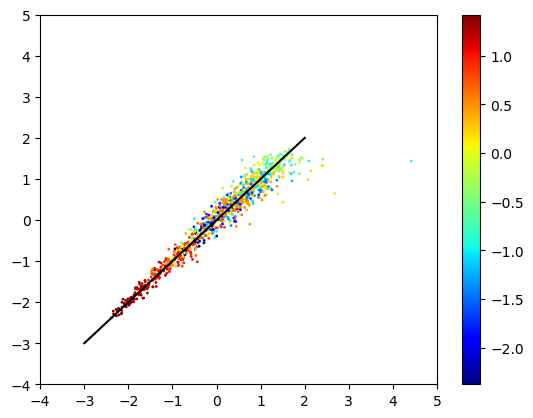

In [55]:
import numpy as np
import torch
from utils_training import getLoader

train_loader = getLoader(datalist_dir=f'{MAIN_DIR}\\preprocessing\\graph_torchdata\\{45}\\train_datalist.pickle',
                         batch_fraction=1/180,
                         )

val_loader = getLoader(datalist_dir=f'{MAIN_DIR}\\preprocessing\\graph_torchdata\\{45}\\val_datalist.pickle',
                       batch_fraction=1.0,
                       )
## 
from utils_training import GNN
iterer = iter(train_loader)
train_batch = next(iterer)
y = model(train_batch)
from matplotlib import pyplot as plt
plt.scatter(train_batch.fip.detach().numpy(), y.detach().numpy(), s=1, c=train_batch.x[:,16], cmap='jet')
plt.colorbar()
plt.plot([-3,2],[-3,2],color='black')
plt.xlim((-4,5))
plt.ylim((-4,5))
import torch.nn.functional as F
print(F.mse_loss(y, train_batch.fip))
# print(np.mean(np.abs(y.detach().numpy() - train_batch.fip.detach().numpy()/train_batch.fip.detach().numpy())))
print(F.l1_loss(y, train_batch.fip))

tensor(0.0663, grad_fn=<MseLossBackward0>)
tensor(0.1814, grad_fn=<MeanBackward0>)


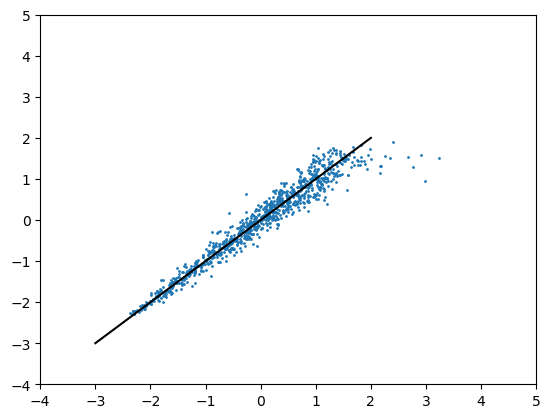

In [106]:
train_batch = next(iterer)
y = model(train_batch)
from matplotlib import pyplot as plt
plt.scatter(train_batch.fip.detach().numpy(), y.detach().numpy(), s=1, cmap='jet')
# plt.colorbar()
plt.plot([-3,2],[-3,2],color='black')
plt.xlim((-4,5))
plt.ylim((-4,5))
import torch.nn.functional as F
print(F.mse_loss(y, train_batch.fip))
# print(np.mean(np.abs(y.detach().numpy() - train_batch.fip.detach().numpy()/train_batch.fip.detach().numpy())))
print(F.l1_loss(y, train_batch.fip))